# Top 100 Video Game Sales

## Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_theme(style="whitegrid", palette="flare")

In [3]:
games = pd.read_csv('top100videogamesales.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## Global Sales

### Total global sales for each year

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

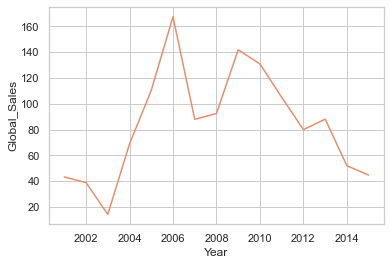

In [20]:
sales_by_year = games.groupby('Year').sum()
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales')

> Over these years 2006 was by far the best year in sales for these tites

### ⭐ What percentage of global sales does PlayStation have in the dataset?

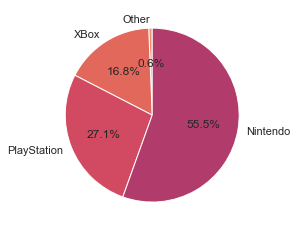

In [217]:
sales_by_platform = games.groupby("Platform").sum()["Global_Sales"].sort_values()
plt.pie(sales_by_platform, labels=sales_by_platform.keys(), autopct='%.1f%%', startangle=90)
plt.show();

According to the chart above 27.1% of all sales were for the PlayStation console 

### ⭐ Sales by region for each publisher (bar chart)

<AxesSubplot:ylabel='Publisher'>

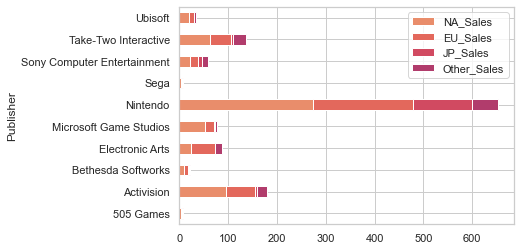

In [234]:
sales_by_publisher = games.groupby('Publisher').sum()[['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']]

sales_by_publisher.plot(kind='barh', stacked=True)


> From this chart we can tell that Ninteno is the Publisher with most copies sold in this top 100, followed by Activision and Take-Two. We can also tell that Microsoft has most of its sales happening in North America while Electronic arts seems to do have most of their sales happening in Europe. 

## Games Distrubution

### Global sales distribution for games with Action as the genre (Histogram)

<AxesSubplot:xlabel='Number of Global Sales', ylabel='Number of Games'>

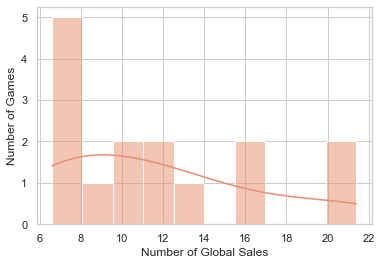

In [80]:
action_games = games[games['Genre'] == 'Action']

plt.ylabel('Number of Games')
plt.xlabel('Number of Global Sales')

sns.histplot(data=action_games, x='Global_Sales', bins=10, kde=True)

> Most of the games in the Action Genre reach 7-8 milion sales with. Only two titles made it past the 20 milion copies sold mark.

### ⭐ What is the distribution of sales for Shooter games

<AxesSubplot:xlabel='Number of Global Sales', ylabel='Number of Games'>

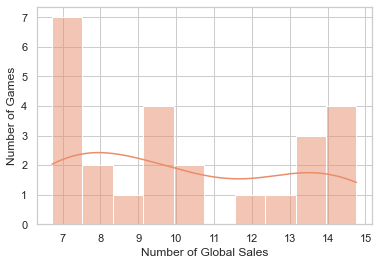

In [83]:
shooter_games = games[games['Genre'] == 'Shooter']

plt.ylabel('Number of Games')
plt.xlabel('Number of Global Sales')

sns.histplot(data=shooter_games, x='Global_Sales', bins=10, kde=True)

> Most of the Shooter games reach about 7 milion copies sold but there are also 4 titles that reached the 9-10 milion and 14-15 milion ranges. 

## Sales by Genre

### Percentage of sales each genre had in the North American market (Pie chart)
_Group smaller slices together into an "other" category to make it easier to read_

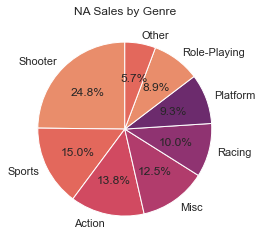

In [219]:
# Get all NA sales per genre
na_sales_by_genre = games.groupby('Genre').sum()['NA_Sales'].sort_values(ascending=False)
# Create 'Other' to combine the 3 smaller genres
other = na_sales_by_genre[:6:-1]
# Filter all genres that have been combined into "Other" and add "Other" to the dataset
na_sales_by_genre = na_sales_by_genre[:7]
# Add "Other" to the filtered data set
na_sales_by_genre['Other'] = other.sum()

plt.pie(na_sales_by_genre, labels=na_sales_by_genre.keys(), autopct='%.1f%%', startangle=90)
plt.title('NA Sales by Genre')
plt.show();

#### Other category

In [208]:
other.head()

Genre
Puzzle         3.44
Fighting      14.40
Simulation    14.61
Name: NA_Sales, dtype: float64

> Puzzle, Fighting and Simulation genres only took up a small portion of sales so they were combined into the "Other" genre

### Percentage of sales each genre had in the European market (Pie chart)
_Group smaller slices together into an "other" category to make it easier to read_

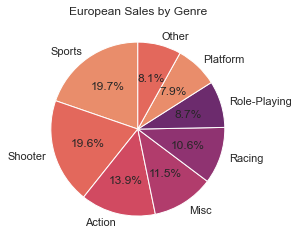

In [209]:
# Get all EU sales per genre
eu_sales_by_genre = games.groupby('Genre').sum()['EU_Sales'].sort_values(ascending=False)
# Create 'Other' to combine the 3 smaller genres
other = eu_sales_by_genre[:6:-1]
# Filter all genres that have been combined into "Other" and add "Other" to the dataset
eu_sales_by_genre = eu_sales_by_genre[:7]
# Add "Other" to the filtered data set
eu_sales_by_genre['Other'] = other.sum()

plt.pie(eu_sales_by_genre, labels=eu_sales_by_genre.keys(), autopct='%.1f%%', startangle=90)
plt.title('European Sales by Genre')
plt.show();

#### Other category

In [210]:
other.head()

Genre
Fighting       5.00
Puzzle         5.36
Simulation    23.26
Name: EU_Sales, dtype: float64

> Puzzle, Fighting and Simulation genres only took up a small portion of sales so they were combined into the "Other" genre

> #### Explain the differences and similarities between the NA and EU charts
> - In North America the Shooter genre is most popular followed by Sports. In Europe those genres are pretty much tied telling us that the Sports genre is more popular in Europe than in North America. 
> - The genres that make up for 8-14% of the market share are very similar in the two regions

## Games

### Total number of games created for each platform (Bar or Column Chart)

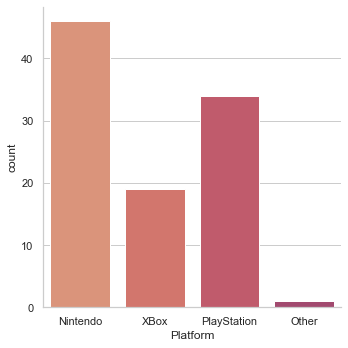

In [220]:
sns.catplot(kind='count', data=games, x='Platform')

> This chart shows that most of the top 100 games are for the Nintendo consoles followed by PlayStation and Xbox taking the third spot. Other consoles are very underrepresented in the Top 100

### ⭐ What genre of game is present the most in the top 100 games from 2000 - 2015? 

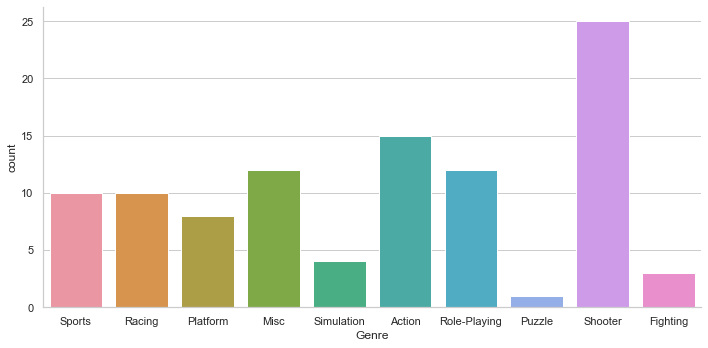

In [225]:
sns.catplot(kind='count', data=games, x='Genre', aspect=2)

> This barchart shows that the Shooter genre is represented most in the top 100, followed by Action and Role-Playing